In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vijaykumar1799/face-mask-detection")

print("Path to dataset files:", path)

100%|██████████| 222M/222M [01:13<00:00, 3.18MB/s] 

Extracting files...


Path to dataset files: /Users/kunalkoshta/.cache/kagglehub/datasets/vijaykumar1799/face-mask-detection/versions/1


In [2]:
import os
with_mask=[]
without_mask=[]

for i in os.listdir(path):
    for j in os.listdir(os.path.join(path,i)):
      for k in os.listdir(os.path.join(path,i,j)):
        x = os.path.join(path,i,j,k)
        if j=='with_mask':
          with_mask.append(x)
        elif j=='without_mask':
          without_mask.append(x)

In [3]:
print(len(with_mask),len(without_mask))

2994 2994


In [4]:
y_mask = [1]*len(with_mask)
y_nomask = [0]*len(without_mask)

In [5]:
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

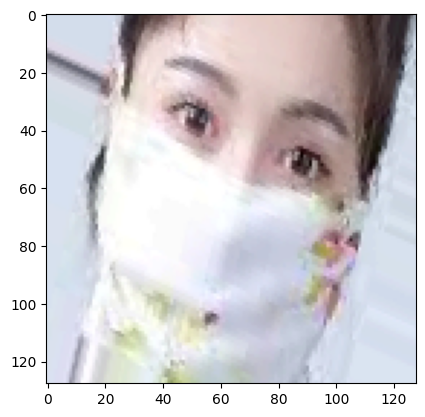

In [6]:
img = Image.open(with_mask[0])
plt.imshow(img)

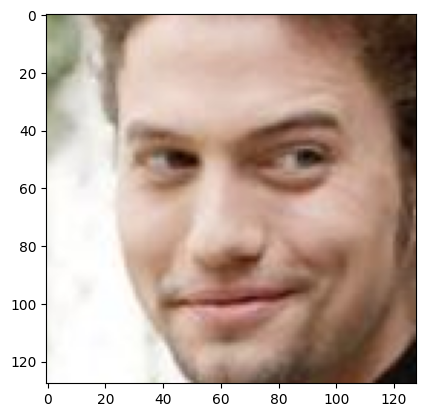

In [7]:
img2 = Image.open(without_mask[0])
plt.imshow(img2)

In [8]:
data = []

for image in with_mask:
  img = Image.open(image)
  img = img.resize((128,128))
  img = img.convert('RGB')
  img1 = np.array(img)
  data.append(img1)

for image in without_mask:
  img = Image.open(image)
  img = img.resize((128,128))
  img = img.convert('RGB')
  img1 = np.array(img)
  data.append(img1)


In [9]:
labels = y_mask + y_nomask

In [10]:
X = np.array(data)
y = np.array(labels)

In [11]:
X[0].shape

(128, 128, 3)

In [12]:
y.shape

(5988,)

In [13]:
X = X/225

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [16]:
X_train.shape

(4790, 128, 128, 3)

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [18]:
model = Sequential()

model.add(Conv2D(64,kernel_size=(3,3), input_shape=X[0].shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,829,697 (56.57 MB)

 Trainable params: 14,829,697 (56.57 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
 21/120 ━━━━━━━━━━━━━━━━━━━━ 1:05 663ms/step - accuracy: 0.6651 - loss: 0.8576

KeyboardInterrupt: 

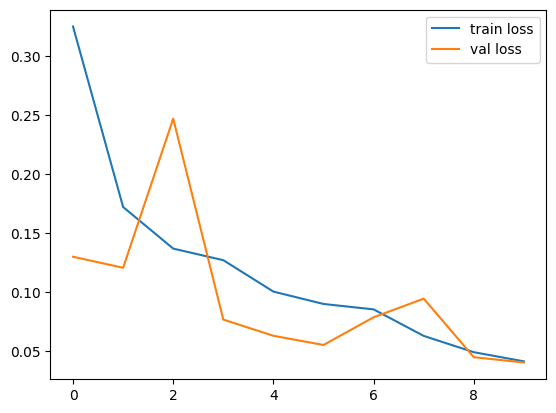

In [21]:
plt.plot(model.history.history['loss'], label='train loss')
plt.plot(model.history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

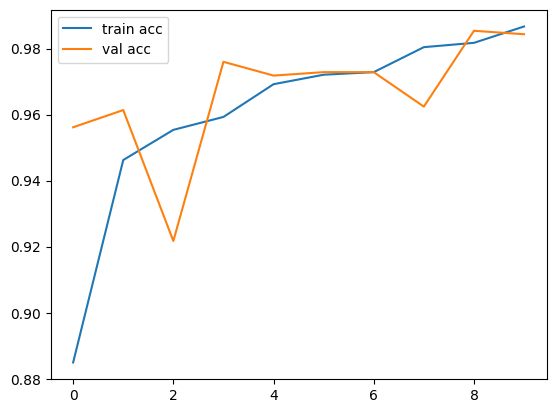

In [22]:
plt.plot(model.history.history['accuracy'], label='train acc')
plt.plot(model.history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [23]:
y_pred = model.predict(X_test)

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


In [24]:
from sklearn.metrics import accuracy_score

In [27]:
res = np.where(y_pred>0.5,1,0)

In [28]:
accuracy_score(y_test,res)

0.986644407345576

Give image path: /content/WhatsApp Image 2024-12-21 at 20.52.25.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Without mask


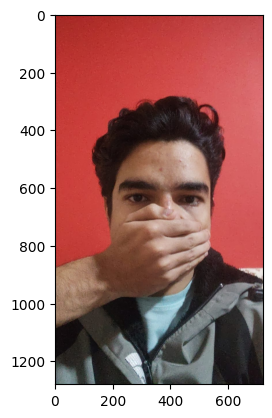

In [36]:
img_path = input('Give image path: ')

img = Image.open(img_path)
plt.imshow(img)
img = img.resize((128,128))
img = img.convert('RGB')
img1 = np.array(img)
img1 = img1/225
img1 = img1.reshape(1,128,128,3)

ans = model.predict(img1)
if ans>0.5:
  print('With mask')
else:
  print('Without mask')